<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/spotify_reviews_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [134]:
#loading data
df = pd.read_csv('/content/reviews.csv')
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [135]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


## 1. Preprocessing the Data:

### 1.1 Drop unnecessary columns and handle missing values

In [131]:
# Drop 'Time_submitted' and 'Reply' columns
df = df.drop(columns=['Time_submitted', 'Reply'])

# Check for any missing values
df.isnull().sum()

,0
Review,0
Rating,0
Total_thumbsup,0


### 1.2 Create a target column (Sentiment) based on the Rating column

- Positive sentiment can be assigned for ratings 4 and 5.
- Negative sentiment for ratings 1 and 2.
- Neutral sentiment for ratings 3.

In [132]:
# Create a new 'Sentiment' column based on 'Rating'
def map_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Rating'].apply(map_sentiment)

### 1.3  Text Preprocessing (Cleaning the Reviews)

cleaning the reviews before feeding them into the model. This involves:

- Converting to lowercase: Helps standardize the text (e.g., "Great" and "great" are considered the same).
- Removing stopwords: Words like "the," "is," "in," which don’t add much meaning in sentiment analysis.
- Lemmatization: Converts words to their base form (e.g., "running" becomes "run").

In [133]:
df_500 = df.head(10000)
df_500.head()

,Review,Rating,Total_thumbsup,Sentiment
0,"Great music service, the audio is high quality...",5,2,positive
1,Please ignore previous negative rating. This a...,5,1,positive
2,"This pop-up ""Get the best Spotify experience o...",4,0,positive
3,Really buggy and terrible to use as of recently,1,1,negative
4,Dear Spotify why do I get songs that I didn't ...,1,1,negative


In [ ]:
# Load the Spacy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Process text with Spacy
    doc = nlp(text)

    # Lemmatize and remove stopwords and punctuation
    cleaned_text = " ".join([token.lemma_ for token in doc if token.text not in STOP_WORDS and not token.is_punct])

    return cleaned_text

In [ ]:
# Apply the cleaning function to the 'Review' column
df_500['Cleaned_Review'] = df_500['Review'].apply(clean_text)

# Display the first few rows of the cleaned data
df_500.head()

<ipython-input-99-1eae9f6e8f08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_500['Cleaned_Review'] = df_500['Review'].apply(clean_text)


,Time_submitted,Review,Rating,Total_thumbsup,Cleaned_Review,Sentiment
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,great music service audio high quality app eas...,positive
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,ignore previous negative rating app super grea...,positive
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,pop good spotify experience android 12 annoyin...,negative
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,buggy terrible use recently,negative
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,dear spotify song playlist shuffle play,neutral


## 3. Feature Extraction:

**Text Vectorization**

- Text data needs to be transformed into numerical format since machine learning models cannot directly work with text.

- I will choose TF-IDF (Term Frequency-Inverse Document Frequency) because it reflects how important a word is within a document and across the entire dataset. This is particularly useful for capturing the essence of a text review without giving too much importance to common words (like "the", "is", etc.).

**TF-IDF Explanation:**

- TF (Term Frequency): Measures how frequently a word appears in a document.
- IDF (Inverse Document Frequency): Measures how common or rare a word is across all documents. Rare words are given higher weightage.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Transform the cleaned reviews into TF-IDF features
X = vectorizer.fit_transform(df_500['Cleaned_Review'])

# Convert to a DataFrame for easier interpretation
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the transformed features (first 5 rows)
X_df.head()

,00,000,03,06,07,10,100,1000,10000,10min,...,𝗼𝗳,𝗼𝘃𝗲𝗿,𝗽𝗹𝗮𝘆𝗶𝗻𝗴,𝗿𝗲𝗮𝗹𝗹𝘆,𝘀𝗵𝗼𝘂𝗹𝗱,𝘀𝗼𝗻𝗴,𝘀𝗼𝗻𝗴𝘀,𝘀𝘁𝗶𝗹𝗹,𝘁𝗵𝗲,𝘁𝗵𝗶𝘀
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sentiment Labels

Positive: Rating ≥ 4
Neutral: Rating = 3
Negative: Rating ≤ 2

In [ ]:
# Define sentiment categories based on the rating
df_500['Sentiment'] = df_500['Rating'].apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))

# Check the new sentiment column
df_500['Sentiment'].value_counts()

<ipython-input-101-1d027cafd6aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_500['Sentiment'] = df_500['Rating'].apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))


,count
Sentiment,
positive,5533
negative,3446
neutral,1021


### Visualize the Sentiment Analysis ResultsVisualize the Sentiment Analysis Results

### Sentiment Distribution

<ipython-input-102-8de15c80d8c4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


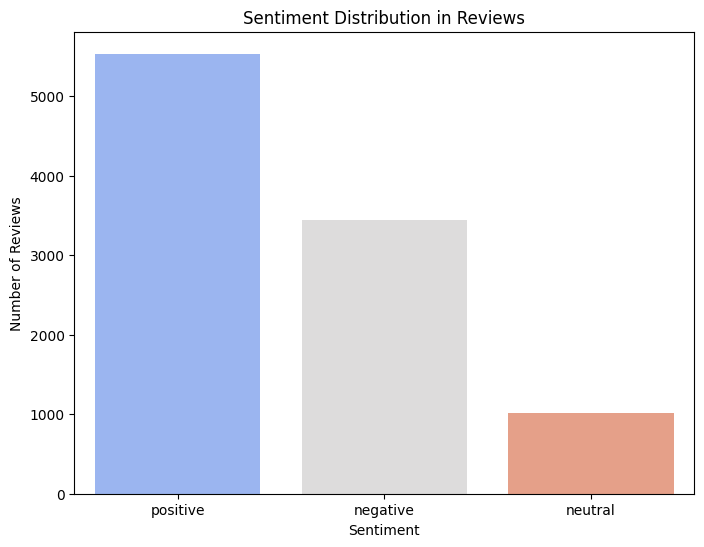

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences of each sentiment
sentiment_counts = df_500['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution in Reviews')
plt.show()

### Rating Distribution

<ipython-input-103-984f64eb1af5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_500, x='Rating', palette='coolwarm')


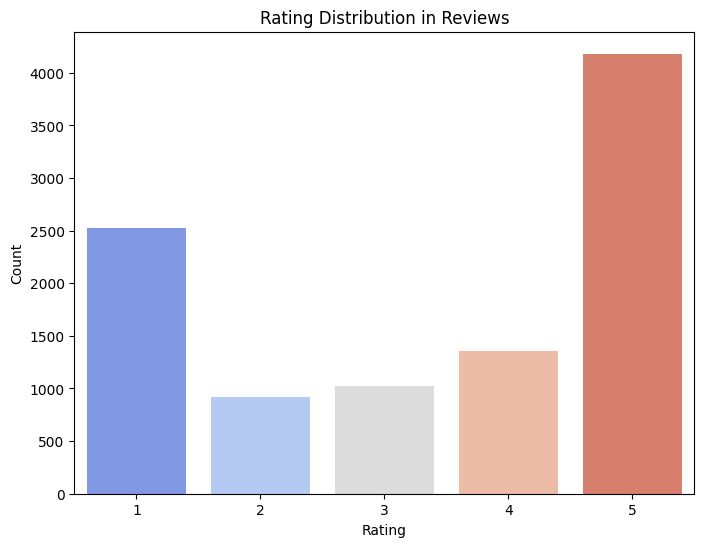

In [ ]:
# Plot the rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_500, x='Rating', palette='coolwarm')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution in Reviews')
plt.show()

### Visualizing Sentiment vs Rating

To get a better understanding of how the sentiments correlate with ratings, we can visualize sentiment in relation to the rating.

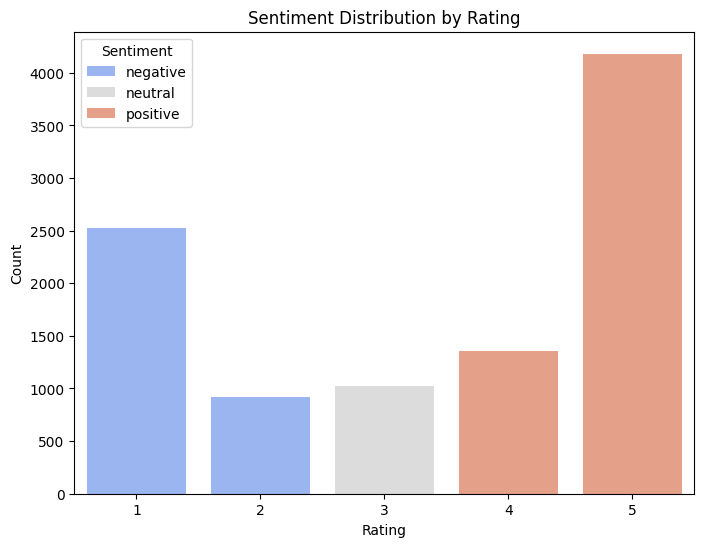

In [ ]:
# Plot sentiment vs rating
plt.figure(figsize=(8, 6))
sns.countplot(data=df_500, x='Rating', hue='Sentiment', palette='coolwarm')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Rating')
plt.show()

### Wordcloud for Sentiment Analysis

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Create a word cloud for each sentiment
positive_reviews = " ".join(df_500[df_500['Sentiment'] == 'positive']['Cleaned_Review'])
neutral_reviews = " ".join(df_500[df_500['Sentiment'] == 'neutral']['Cleaned_Review'])
negative_reviews = " ".join(df_500[df_500['Sentiment'] == 'negative']['Cleaned_Review'])

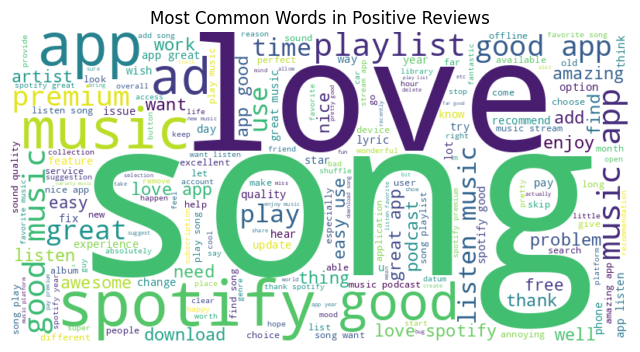

In [ ]:
# Plot wordcloud for positive sentiment
plt.figure(figsize=(8, 6))
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Positive Reviews')
plt.axis('off')
plt.show()

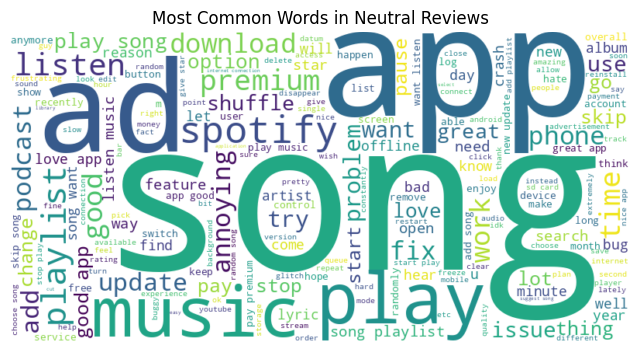

In [ ]:
# Plot wordcloud for neutral sentiment
plt.figure(figsize=(8, 6))
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Neutral Reviews')
plt.axis('off')
plt.show()

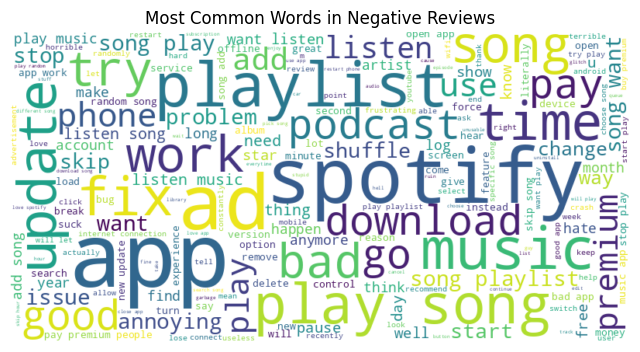

In [ ]:
# Plot wordcloud for negative sentiment
plt.figure(figsize=(8, 6))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Negative Reviews')
plt.axis('off')
plt.show()

## Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Sentiment' column is the target variable
X = X_df  # Feature matrix
y = df_500['Sentiment']  # Target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modelling

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

## Evaluation Metrics

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.90%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

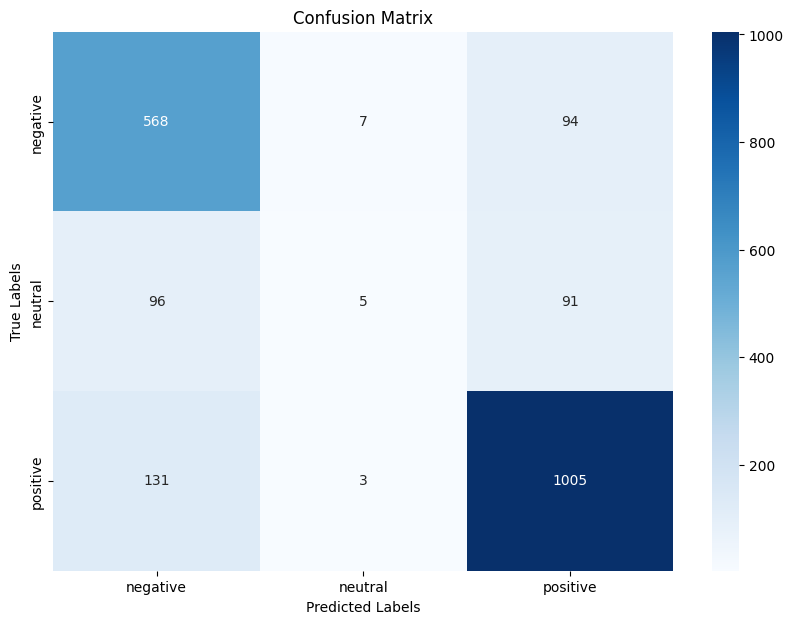

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

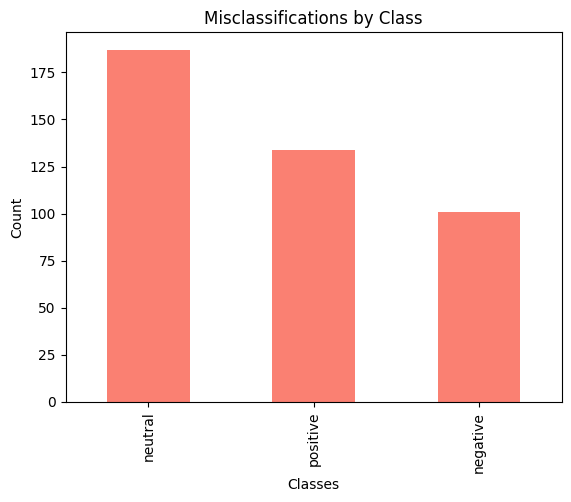

In [ ]:
import pandas as pd

# Create a DataFrame for actual vs predicted labels
df_errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Filter the rows where prediction is incorrect
misclassified = df_errors[df_errors['Actual'] != df_errors['Predicted']]

# Plot the count of misclassifications by class
misclassified_counts = misclassified['Actual'].value_counts()
misclassified_counts.plot(kind='bar', color='salmon')
plt.title('Misclassifications by Class')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


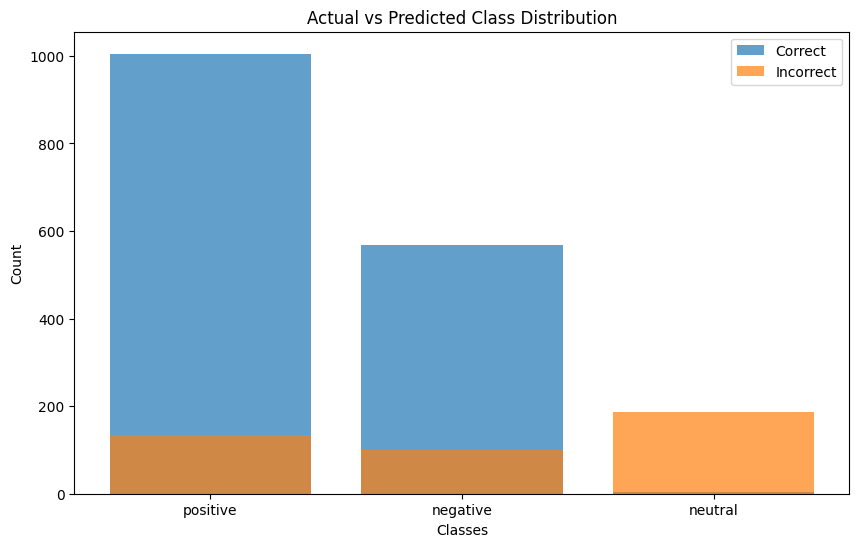

In [ ]:
correct = df_errors[df_errors['Actual'] == df_errors['Predicted']]
correct_counts = correct['Actual'].value_counts()

# Plot for correct and incorrect classifications
plt.figure(figsize=(10, 6))
plt.bar(correct_counts.index, correct_counts.values, label="Correct", alpha=0.7)
plt.bar(misclassified_counts.index, misclassified_counts.values, label="Incorrect", alpha=0.7)
plt.title('Actual vs Predicted Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# Extract the rows where predictions were incorrect
misclassified_instances = df_errors[df_errors['Actual'] != df_errors['Predicted']]

# Display the actual and predicted values for a few errors
print(misclassified_instances.head())

        Actual Predicted
6252  negative  positive
6340   neutral  negative
5202  positive  negative
5272   neutral  negative
9485  negative  positive


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred, target_names=df_500.Sentiment.unique()))

              precision    recall  f1-score   support

    positive       0.71      0.85      0.78       669
    negative       0.33      0.03      0.05       192
     neutral       0.84      0.88      0.86      1139

    accuracy                           0.79      2000
   macro avg       0.63      0.59      0.56      2000
weighted avg       0.75      0.79      0.76      2000



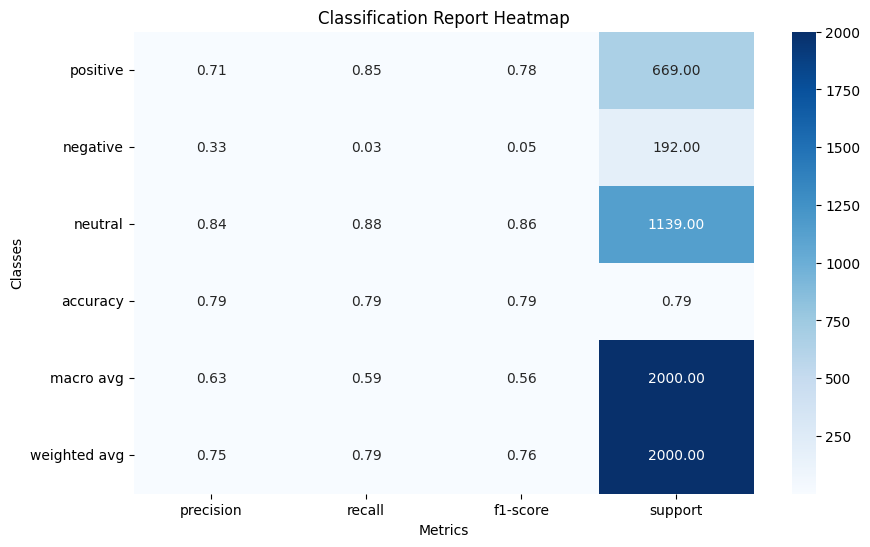

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=df_500.Sentiment.unique(), output_dict=True)


# Convert report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

## Predictions

In [ ]:
# Example prediction on Spotify reviews
new_review = ["This app has great music selection, but it keeps freezing."]
new_review_cleaned = [clean_text(review) for review in new_review]

# Transform the new review using the same vectorizer used for training
new_review_vectorized = vectorizer.transform(new_review_cleaned)

# Ensure the feature names are preserved
new_review_vectorized = pd.DataFrame(new_review_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Make a prediction using the trained model
prediction = model.predict(new_review_vectorized)

# Output the prediction
print("Predicted sentiment:", prediction[0])  # This will print the predicted sentiment (positive, negative, neutral)

Predicted sentiment: positive


In [ ]:
# Example prediction on Spotify reviews
new_review = ["Really buggy and terrible to use as of recently"]
new_review_cleaned = [clean_text(review) for review in new_review]

# Transform the new review using the same vectorizer used for training
new_review_vectorized = vectorizer.transform(new_review_cleaned)

# Ensure the new review has the same shape (i.e., same number of features) as the training data
new_review_vectorized_df = pd.DataFrame(new_review_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Make a prediction using the trained model
prediction = model.predict(new_review_vectorized_df)

# Output the prediction
print("Predicted sentiment:", prediction[0])  # This will print the predicted sentiment (positive, negative, neutral)

Predicted sentiment: negative
